In [1]:
from velocity_field          import VelocityField
from plots                   import spiral_v_contours_plot
from rakifov_wake            import RafikovWake
from copy                    import deepcopy
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.axes_grid1 import ImageGrid

import matplotlib.pylab as plt
import numpy            as np

In [11]:
plt.rcParams['axes.labelsize']  = 15
plt.rcParams['legend.fontsize'] = 15
plt.rcParams["figure.figsize"]  = [10.,10.]
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.rcParams['axes.titlesize']  = 15
plt.rcParams['lines.dash_capstyle'] = 'round'
plt.rcParams['lines.linewidth'] = 3
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# Figure 3

In [3]:
wf0 = VelocityField(type="wakeflow",     name="bigdisk_nolin/3.0Mj")
wfT = VelocityField(type="wakeflow",     name="bigdisk_nolin/3.0Mj_total")

pos_angle = 45
planet_az = 55
inclination = -225


rot_wf0 = deepcopy(wf0)
rot_wfT = deepcopy(wfT)
rot_wf0.rotate(PA=pos_angle, planet_az=planet_az, inc=inclination, grid_rotate=True)
rot_wfT.rotate(PA=pos_angle, planet_az=planet_az, inc=inclination, grid_rotate=True)

Constructing VelocityField object of type wakeflow using bigdisk_nolin/3.0Mj
Constructing VelocityField object of type wakeflow using bigdisk_nolin/3.0Mj_total
Rotating velocity field
edge height =  9.519135269192438e-05
Rotating velocity field
edge height =  9.519135269192438e-05


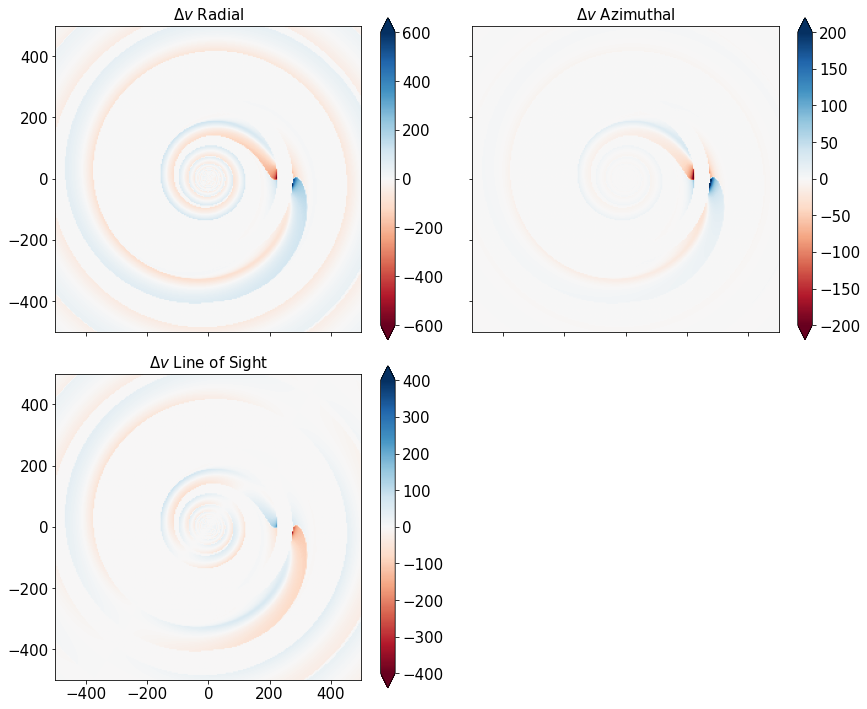

In [4]:
fig, ax = plt.subplots(2, 2, 
                       sharex=True, sharey=True, 
                       gridspec_kw={'width_ratios': [1, 1], 'height_ratios': [1, 1]}, 
                       figsize=[12,10])

fig.tight_layout()

extent = (-1000,1000,-1000,1000)

# all subplots
for i in range(2):
    for j in range(2):
        ax[i,j].axis('scaled')
        ax[i,j].set_xlim(-500, 500)
        ax[i,j].set_ylim(-500, 500)

# plot v_r component
c1 = ax[0,0].imshow(np.flipud(1e3*wf0.v_r.transpose()), cmap='RdBu', extent=extent, vmin=-600, vmax=600)

# plot v_phi component
c2 = ax[0,1].imshow(np.flipud(1e3*wf0.v_phi.transpose()), cmap='RdBu', extent=extent, vmin=-200, vmax=200)

# plot v_LOS component
c3 = ax[1,0].imshow(np.flipud(rot_wf0.v_field[2,:,:].transpose()), cmap='RdBu', extent=extent, vmin=-400, vmax=400)

# hide last axes
ax[1,1].axis('off')

# titles
ax[0,0].set_title(r'$\Delta v$ Radial')
ax[0,1].set_title(r'$\Delta v$ Azimuthal')
ax[1,0].set_title(r'$\Delta v$ Line of Sight')

# colorbars
plt.colorbar(c1, ax=ax[0,0], extend='both')
plt.colorbar(c2, ax=ax[0,1], extend='both')
plt.colorbar(c3, ax=ax[1,0], extend='both')

#plt.savefig('components.pdf', bbox_inches='tight')
plt.show()

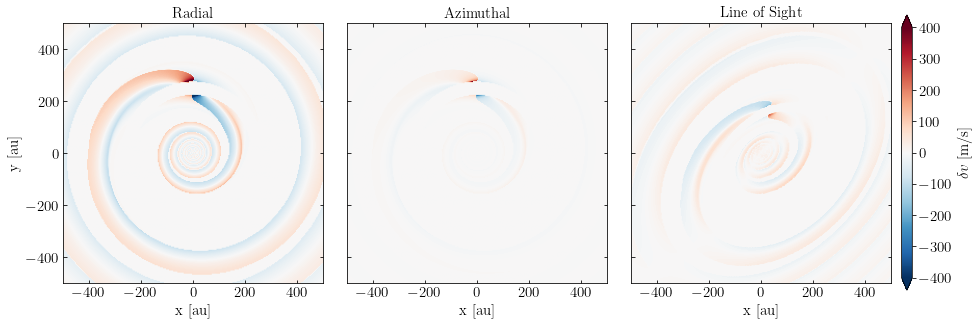

In [14]:
fig, ax = plt.subplots(1, 3, 
                       sharex=True, sharey=True, 
                       gridspec_kw={'width_ratios': [1, 1, 1]},
                       figsize=[15,4.5]
)

fig.tight_layout()

extent = (-1000,1000,-1000,1000)

lim = 400
levels = np.linspace(-lim, lim, 200)

# all subplots
for i in range(3):
    ax[i].axis('scaled')
    ax[i].set_xlim(-500, 500)
    ax[i].set_ylim(-500, 500)
    ax[i].set_xlabel('x [au]')
    ax[i].xaxis.set_ticks_position('both')
    ax[i].yaxis.set_ticks_position('both')
    ax[i].xaxis.set_tick_params(direction='in')
    ax[i].yaxis.set_tick_params(direction='in')
    
ax[0].set_ylabel('y [au]')

# plot v_r component
c1 = ax[0].imshow(np.flipud(1e3*wf0.v_r), cmap='RdBu_r', extent=extent, vmin=-lim, vmax=lim)

# plot v_phi component
c2 = ax[1].imshow(np.flipud(1e3*wf0.v_phi), cmap='RdBu_r', extent=extent, vmin=-lim, vmax=lim)

# plot v_LOS component
c3 = ax[2].contourf(rot_wf0.X, rot_wf0.Y, rot_wf0.v_field[2,:,:], cmap='RdBu_r', levels=levels, extend='both')

# titles
ax[0].set_title(r'Radial')
ax[1].set_title(r'Azimuthal')
ax[2].set_title(r'Line of Sight')

# colorbar
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.81, 0.1, 0.01, 0.85])
fig.colorbar(c1, cax=cbar_ax, extend='both', label=r'$\delta v$ [m/s]')

plt.savefig('components.pdf', bbox_inches='tight')
plt.show()

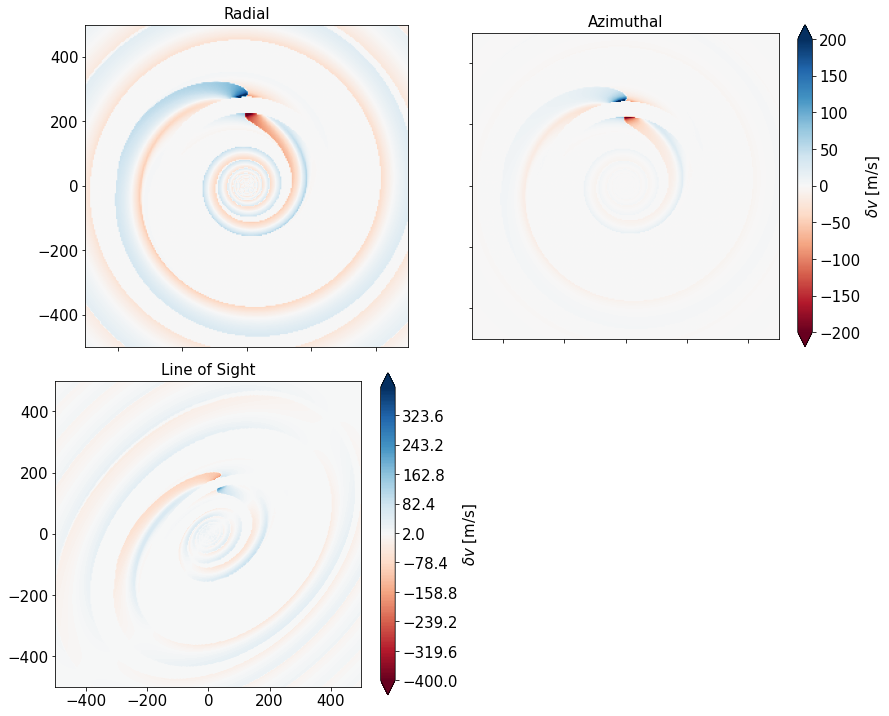

In [6]:
fig, ax = plt.subplots(2, 2, 
                       sharex=True, sharey=True, 
                       gridspec_kw={'width_ratios': [1, 1], 'height_ratios': [1, 1]}, 
                       figsize=[12,10])

fig.tight_layout()

extent = (-1000,1000,-1000,1000)
lims = [400,200,400]
levels = np.linspace(-400, 400, 200)

# all subplots
for i in range(2):
    for j in range(2):
        ax[i,j].axis('scaled')
        ax[i,j].set_xlim(-500, 500)
        ax[i,j].set_ylim(-500, 500)

# plot v_r component
c1 = ax[0,0].imshow(np.flipud(1e3*wf0.v_r), cmap='RdBu', extent=extent, vmin=-lims[0], vmax=lims[0])

# plot v_phi component
c2 = ax[0,1].imshow(np.flipud(1e3*wf0.v_phi), cmap='RdBu', extent=extent, vmin=-lims[1], vmax=lims[1])

# plot v_LOS component
c3 = ax[1,0].contourf(rot_wf0.X, rot_wf0.Y, rot_wf0.v_field[2,:,:], cmap='RdBu', levels=levels, extend='both')

# hide last axes
ax[1,1].axis('off')

# titles

ax[0,0].set_title(r'Radial')
ax[0,1].set_title(r'Azimuthal')
ax[1,0].set_title(r'Line of Sight')

# colorbars
#plt.colorbar(c1, ax=ax[0,0], extend='both', label='$\delta v$')
plt.colorbar(c2, ax=ax[0,1], extend='both', label='$\delta v$ [m/s]')
plt.colorbar(c3, ax=ax[1,0], label='$\delta v$ [m/s]')

#plt.savefig('components.pdf', bbox_inches='tight')
plt.show()

# Figure 4

In [7]:
max_level   = 2950
width       = 30
no_levels   = 17

levels      = []
level       = -max_level
interval    = (max_level) / (no_levels // 2)
for _ in range(no_levels):
    
    # add level
    levels.append(level - width/2)
    levels.append(level + width/2)
    
    # update level
    level += interval
    
print(levels)

[-2965.0, -2935.0, -2596.25, -2566.25, -2227.5, -2197.5, -1858.75, -1828.75, -1490.0, -1460.0, -1121.25, -1091.25, -752.5, -722.5, -383.75, -353.75, -15.0, 15.0, 353.75, 383.75, 722.5, 752.5, 1091.25, 1121.25, 1460.0, 1490.0, 1828.75, 1858.75, 2197.5, 2227.5, 2566.25, 2596.25, 2935.0, 2965.0]


In [8]:
wake = RafikovWake(hrp=0.075, q=0.25, Rp=250, gap=True)
wake.rotate_wake(pos_angle, planet_az, inclination, 101.5)
wake.angular_coords(101.5)

In [9]:
max_level   = 2950/1e3
no_levels   = 17

levels = np.linspace(-max_level, max_level, no_levels)

cmap = plt.cm.get_cmap('RdBu')
r_cmap = cmap.reversed()

s1 = VelocityField(type="observations", name="HD_163296_CO_220GHz.0.2arcsec.JvMcorr.image_v0.fits")
s2 = rot_wfT
r = wake

s2.convert_to_angular_coordinates()

fig, ax = plt.subplots(1, 2, figsize=[9,3.8], sharey=True)
fig.tight_layout()

lim = 4.5
ax[0].set_xlabel('$\Delta$ RA ["]')
ax[1].set_xlabel('$\Delta$ RA ["]')
ax[0].set_ylabel('$\Delta$ Dec ["]')
ax[0].axis('scaled')
ax[1].axis('scaled')
ax[0].set_xlim(-lim,lim)
ax[0].set_ylim(-lim,lim)
ax[1].set_xlim(lim,-lim)
ax[1].set_ylim(-lim,lim)
ax[1].plot(-r.X[:-360], r.Y[:-360], c="k", alpha=0.2, ls="--", linewidth=0.8)
ax[0].plot(r.X[:-360], r.Y[:-360], c="k", alpha=0.2, ls="--", linewidth=0.8)
cc = ax[1].contourf(s1.X, s1.Y, s1.data/1e3, levels=levels, cmap=r_cmap, extend='both')
ax[0].contourf(s2.X, s2.Y, s2.v_field[2,:,:]/1e3, levels=levels, cmap=r_cmap, extend='both')

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.82, 0.1, 0.02, 0.85])
fig.colorbar(cc, cax=cbar_ax, label=r'$v$ [km/s]')

plt.savefig('moment_spiral.pdf', bbox_inches='tight', dpi=300)
plt.show()

Constructing VelocityField object of type observations using HD_163296_CO_220GHz.0.2arcsec.JvMcorr.image_v0.fits


TypeError: convert_to_angular_coordinates() missing 1 required positional argument: 'distance'